In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as mcm
import matplotlib.ticker as mticker
import scipy.stats as st
%matplotlib inline

In [2]:
weather=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Jupyter nootbook\\Summer 2017 REU\\gsom_seasonal.csv')
seasonal_tracts=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Jupyter nootbook\\Summer 2017 REU\\seasonal_by_tract.csv')
station=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Jupyter nootbook\\Summer 2017 REU\\tracts_with_nearest_stations.csv')


In [3]:
weather['date']=pd.to_datetime(weather['date'])
weather.head(2)

date datatype  LA GUARDIA AIRPORT, NY US  NY CITY CENTRAL PARK, NY US  \
0 2003-12-01     AWND                        5.8                         3.75   
1 2003-12-01     EMNT                      -12.8                       -13.30   

   JFK INTERNATIONAL AIRPORT, NY US  
0                               6.1  
1                             -13.6

In [4]:
seasonal_tracts['date']=pd.to_datetime(seasonal_tracts['created_date'])
seasonal_tracts.head(2)

complaint_type created_date  1000100  1000201  1000202  1000500  \
0  Street Light Condition    12/1/2003      NaN      NaN      NaN      NaN   
1           Water Quality    12/1/2003      NaN      NaN      NaN      NaN   

   1000600  1000700  1000800  1000900    ...      5027900  5029102  5029103  \
0      NaN      NaN      NaN      NaN    ...          NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN    ...          NaN      NaN      NaN   

   5029104  5030301  5030302  5031901  5031902  5032300       date  
0      NaN      NaN      NaN      NaN      NaN      NaN 2003-12-01  
1      NaN      NaN      NaN      NaN      NaN      NaN 2003-12-01  

[2 rows x 2166 columns]

In [5]:
station.head(2)

boro_ct201      boro_name  ct2010 ntacode  \
0     5000900  Staten Island     900    SI22   
1     1009800      Manhattan    9800    MN19   

                                     ntaname                      station  
0  West New Brighton-New Brighton-St. George  NY CITY CENTRAL PARK, NY US  
1                    Turtle Bay-East Midtown  NY CITY CENTRAL PARK, NY US

In [6]:
lut=dict(zip(station['boro_ct201'].astype(str),station['station']))
lut

{'5000900': 'NY CITY CENTRAL PARK, NY US',
 '1009800': 'NY CITY CENTRAL PARK, NY US',
 '1010000': 'NY CITY CENTRAL PARK, NY US',
 '1010200': 'NY CITY CENTRAL PARK, NY US',
 '1010400': 'NY CITY CENTRAL PARK, NY US',
 '1011300': 'NY CITY CENTRAL PARK, NY US',
 '1011402': 'NY CITY CENTRAL PARK, NY US',
 '1013000': 'NY CITY CENTRAL PARK, NY US',
 '1014000': 'NY CITY CENTRAL PARK, NY US',
 '1014801': 'NY CITY CENTRAL PARK, NY US',
 '1015300': 'NY CITY CENTRAL PARK, NY US',
 '1015400': 'NY CITY CENTRAL PARK, NY US',
 '1018400': 'NY CITY CENTRAL PARK, NY US',
 '1019000': 'NY CITY CENTRAL PARK, NY US',
 '1020102': 'NY CITY CENTRAL PARK, NY US',
 '1020600': 'NY CITY CENTRAL PARK, NY US',
 '1024900': 'NY CITY CENTRAL PARK, NY US',
 '1025300': 'NY CITY CENTRAL PARK, NY US',
 '1025700': 'NY CITY CENTRAL PARK, NY US',
 '1026100': 'NY CITY CENTRAL PARK, NY US',
 '1026300': 'NY CITY CENTRAL PARK, NY US',
 '1026700': 'NY CITY CENTRAL PARK, NY US',
 '1026900': 'NY CITY CENTRAL PARK, NY US',
 '1027700':

In [7]:
heating=seasonal_tracts[seasonal_tracts['complaint_type'].str.match('HEATING')]
#from 2004 to 2014
heating.tail()
heating.head()

complaint_type created_date  1000100  1000201  1000202  1000500  1000600  \
32         HEATING     3/1/2004      NaN      1.0      1.0      NaN     21.0   
55         HEATING     6/1/2004      NaN      1.0      2.0      NaN      1.0   
77         HEATING     9/1/2004      NaN      1.0      7.0      NaN     68.0   
94         HEATING    12/1/2004      NaN     10.0     36.0      NaN    143.0   
121        HEATING     3/1/2005      NaN      NaN      3.0      NaN     48.0   

     1000700  1000800  1000900    ...      5027900  5029102  5029103  5029104  \
32       NaN     28.0      NaN    ...          NaN      NaN      NaN      1.0   
55       1.0     15.0      NaN    ...          NaN      NaN      NaN      NaN   
77       1.0     72.0      2.0    ...          NaN      NaN      4.0      4.0   
94      18.0    134.0      4.0    ...          NaN      1.0      3.0      1.0   
121      1.0     36.0      NaN    ...          NaN      NaN      NaN      NaN   

     5030301  5030302  5031901  5031902  5032300       date  
32       1.0      1.0      NaN      4.0      NaN 2004-03-01  
55       NaN      1.0      NaN     19.0      NaN 2004-06-01  
77       6.0      1.0      1.0     63.0      2.0 2004-09-01  
94       9.0      4.0      1.0    407.0      1.0 2004-12-01  
121      5.0      1.0      NaN     55.0      NaN 2005-03-01  

[5 rows x 2166 columns]

In [8]:
tavg=weather[weather['datatype'].str.match('TAVG')]
tavg=tavg.reset_index()
tavg=tavg.drop('index',1)
tavg.head()

date datatype  LA GUARDIA AIRPORT, NY US  NY CITY CENTRAL PARK, NY US  \
0 2003-12-01     TAVG                  -0.800000                    -1.150000   
1 2004-03-01     TAVG                  12.000000                    12.266667   
2 2004-06-01     TAVG                  23.666667                    22.966667   
3 2004-09-01     TAVG                  15.066667                    14.333333   
4 2004-12-01     TAVG                   1.600000                     1.866667   

   JFK INTERNATIONAL AIRPORT, NY US  
0                         -1.400000  
1                         11.300000  
2                         22.533333  
3                         14.466667  
4                          1.366667

In [9]:
import numpy as np
number=np.arange(42,55,1)
tavg1=tavg.drop(tavg.index[number])
Newtavg=tavg1.drop(0)
Newtavg.head()


date datatype  LA GUARDIA AIRPORT, NY US  NY CITY CENTRAL PARK, NY US  \
1 2004-03-01     TAVG                  12.000000                    12.266667   
2 2004-06-01     TAVG                  23.666667                    22.966667   
3 2004-09-01     TAVG                  15.066667                    14.333333   
4 2004-12-01     TAVG                   1.600000                     1.866667   
5 2005-03-01     TAVG                  10.333333                    10.633333   

   JFK INTERNATIONAL AIRPORT, NY US  
1                         11.300000  
2                         22.533333  
3                         14.466667  
4                          1.366667  
5                          9.633333

In [10]:
tract_list = heating.columns[~heating.columns.isin(["created_date", "complaint_type", "date"])]
tract_list

Index(['1000100', '1000201', '1000202', '1000500', '1000600', '1000700',
       '1000800', '1000900', '1001001', '1001002',
       ...
       '5027706', '5027900', '5029102', '5029103', '5029104', '5030301',
       '5030302', '5031901', '5031902', '5032300'],
      dtype='object', length=2163)

In [11]:
corr = dict()
for tract in tract_list:
    nearest_st = lut[tract]
    corr_df = heating[['date', tract]].merge(Newtavg[['date', nearest_st]], 
                                                left_on = "date", right_on="date")
    
    corr[tract]= corr_df[tract].corr(corr_df[nearest_st])

C:\Users\xuebi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\xuebi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [12]:
corr

{'1000100': nan,
 '1000201': -0.28350794888486824,
 '1000202': -0.41789851358352553,
 '1000500': nan,
 '1000600': -0.65742892029773536,
 '1000700': -0.043787519467997443,
 '1000800': -0.70480706975537744,
 '1000900': -0.3772689415311663,
 '1001001': -0.4790707556210283,
 '1001002': nan,
 '1001200': -0.40035970146448324,
 '1001300': -0.36915930633039185,
 '1001401': -0.1443582205458353,
 '1001402': -0.6585836658531703,
 '1001501': -0.22400349795539956,
 '1001502': -0.49281748535445918,
 '1001600': -0.77392031073637757,
 '1001800': -0.73564022662756057,
 '1002000': -1.0,
 '1002100': -0.52480801261922794,
 '1002201': -0.58468566008375678,
 '1002202': -0.72004627717699032,
 '1002400': nan,
 '1002500': nan,
 '1002601': -0.62096147177284966,
 '1002602': -0.72150469187534727,
 '1002700': -0.50863923740924211,
 '1002800': -0.64968167514837738,
 '1002900': -0.71848666073567702,
 '1003001': -0.75312918245256211,
 '1003002': -0.66797000451760546,
 '1003100': -0.50936649242677723,
 '1003200': -0.7

In [13]:
corrdf=pd.Series(corr).to_frame()
corrdf.head()

0
1000100       NaN
1000201 -0.283508
1000202 -0.417899
1000500       NaN
1000600 -0.657429

In [14]:
import geopandas as gpd
shpfile = 'C:\\Users\\xuebi\\Desktop\\census_tracts\\census_tracts\\census2010.shp'
coord_system = {'init': 'epsg:4326'}#tells how the earth exist 
gdf = gpd.GeoDataFrame.from_file(shpfile, crs=coord_system)

In [15]:
tracts=gdf[['boro_ct201','geometry']].merge(corrdf,
                   left_on='boro_ct201',right_index=True)
tracts.head()

boro_ct201                                           geometry         0
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567... -0.592439
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091... -0.704939
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282... -0.487270
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906... -0.235086
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487... -0.378644

In [16]:
tracts=tracts.rename(columns={0:'correlation'})
sc = gdf[['boro_ct201','geometry']].merge(heating.count().to_frame(),
                   left_on='boro_ct201',right_index=True)
sc=sc.rename(columns={0:'count'})
sc.head()

boro_ct201                                           geometry  count
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...     38
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...     40
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...     34
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...      9
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...     30

In [17]:
sc["rate"] = sc['count']/sc['count'].max()

In [18]:
sc.head()

boro_ct201                                           geometry  count  \
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...     38   
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...     40   
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...     34   
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...      9   
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...     30   

       rate  
0  0.926829  
1  0.975610  
2  0.829268  
3  0.219512  
4  0.731707

In [19]:
heating1= tracts.merge(sc[["boro_ct201", "rate",'count']], right_on='boro_ct201', left_on="boro_ct201")
heating1.head()

boro_ct201                                           geometry  correlation  \
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...    -0.592439   
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...    -0.704939   
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...    -0.487270   
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...    -0.235086   
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...    -0.378644   

       rate  count  
0  0.926829     38  
1  0.975610     40  
2  0.829268     34  
3  0.219512      9  
4  0.731707     30

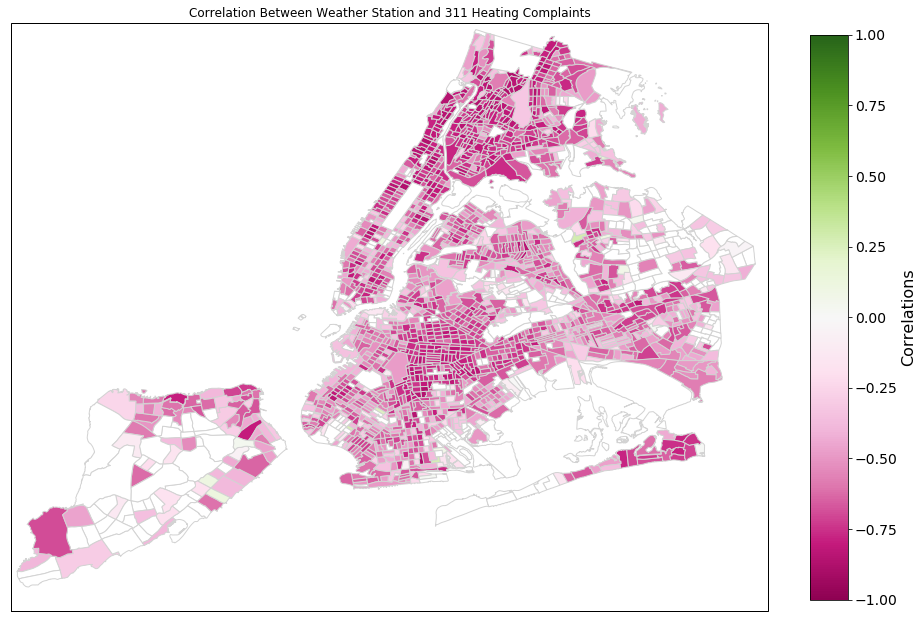

In [49]:
cmap=mcm.PiYG
norm=mcolors.Normalize(vmin=-1,vmax=1)
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15, 15),
                       subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
              ccrs.Geodetic())
ax.set_title(f"Correlation Between Weather Station and 311 Heating Complaints")
for _, row in heating1.iterrows():
    if row['rate']<.5:
        color="white"
    else:
        color = cmap(norm(row["correlation"]))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='lightgrey')
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("Correlations" , fontsize=16)
#when temperature decrease we have heating increase 
#temperature increase we have heating decrease 
#this is why the map is negative corr
fig.savefig('Correlation Between Weather Station and 311 Heating Complaints')

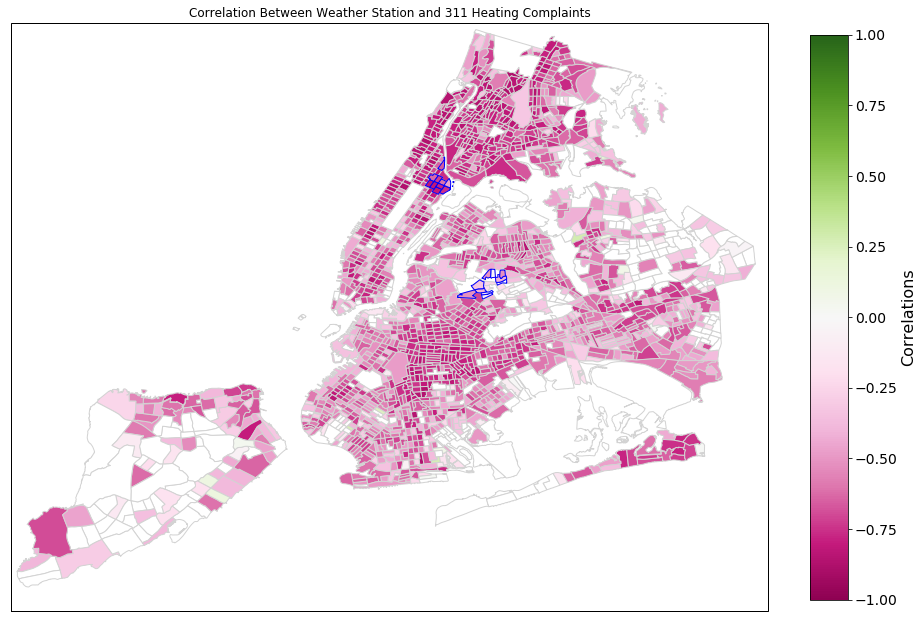

In [71]:
queen_maspeth=['4049500','4052500','4059900','4051300',
            '4060100','4051500','4053500','4049700','4053100','4049302']
east_harlem=['1018400','1019800','1019600','1019400','1018000','1018200',
             '1017800','1018800','1021000','1019200']

cmap=mcm.PiYG
norm=mcolors.Normalize(vmin=-1,vmax=1)
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15, 15),
                       subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
              ccrs.Geodetic())
ax.set_title(f"Correlation Between Weather Station and 311 Heating Complaints")
for _, row in heating1.iterrows():
    if row['rate']<.5:
        color="white"
    else:
        color = cmap(norm(row["correlation"]))
    if row['boro_ct201']in(queen_maspeth):
        ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='blue',zorder=2)
    if row['boro_ct201']in(east_harlem):
        ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='blue',zorder=2)
    else:
        ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='lightgrey')
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("Correlations" , fontsize=16)
#when temperature decrease we have heating increase 
#temperature increase we have heating decrease 
#this is why the map is negative corr
fig.savefig('New Correlation Between Weather Station and 311 Heating Complaints')


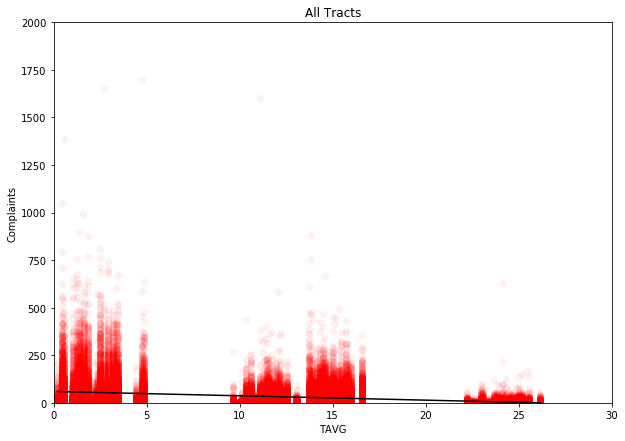

In [41]:
fig,ax=plt.subplots(figsize=(10,7))
imx=[]
imy=[]
for tract in tract_list:
    nearest_st = lut[tract]
    corr_df = heating[['date', tract]].merge(Newtavg[['date', nearest_st]], 
                                                left_on = "date", right_on="date")
    #corr = corr_df[tract] corr_df[nearest_st]
    #corr[tract] = 
    imy.extend(corr_df[tract])
    imx.extend(corr_df[nearest_st])
    ax.scatter(corr_df[nearest_st],corr_df[tract],color='r',alpha=0.05)

d = np.vstack([imx, imy])
not_nan = d[:,~np.isnan(d).any(axis=0)]
myx, myy = not_nan    
slope, intercept, r_value, p_value, std_err = st.linregress(myx, myy)
theory_x = np.linspace(myx.min(), myx.max(), 100)
predicted_y = slope*theory_x +intercept
ax.plot(theory_x, predicted_y, color="black")    
    
ax.set(xlabel='TAVG',ylabel='Complaints',title='All Tracts')
ax.set_xlim(0,30)
ax.set_ylim(0,2000)
fig.savefig('All Heating Tracts')

In [39]:
myx.max(),myy.max()

(26.166666670000001, 4145.0)

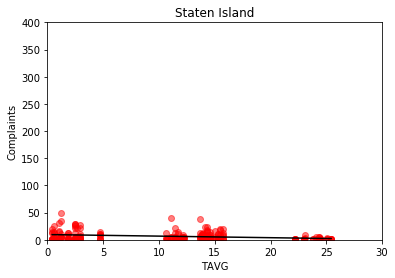

In [42]:
Staten_island=['5000900','5011402','5017009','5025100','5014607','5017010','5032300','5000300','5027702','5014700']
fig,ax=plt.subplots()
imx=[]
imy=[]
for tract in Staten_island:
    nearest_st = lut[tract]
    corr_df = heating[['date', tract]].merge(Newtavg[['date', nearest_st]], 
                                                left_on = "date", right_on="date")
    #corr = corr_df[tract] corr_df[nearest_st]
    #corr[tract] = 
    #H=corr_df[corr_df[tract]>22.5]
    imy.extend(corr_df[tract])
    imx.extend(corr_df[nearest_st])
    ax.scatter(corr_df[nearest_st],corr_df[tract],color='r',alpha=0.5)

d = np.vstack([imx, imy])
not_nan = d[:,~np.isnan(d).any(axis=0)]
myx, myy = not_nan    
slope, intercept, r_value, p_value, std_err = st.linregress(myx, myy)
theory_x = np.linspace(myx.min(), myx.max(), 100)
predicted_y = slope*theory_x +intercept
ax.plot(theory_x, predicted_y, color="black")    
    
ax.set(xlabel='TAVG',ylabel='Complaints',title='Staten Island')
ax.set_xlim(0,30)
ax.set_ylim(0,400)
fig.savefig('Heating Staten Island')

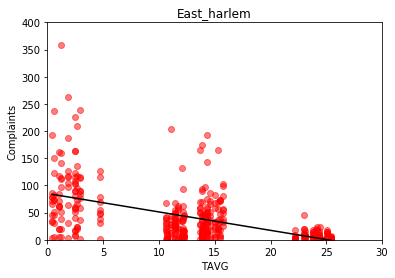

In [43]:
east_harlem=['1018400','1019800','1019600','1019400','1018000','1018200',
             '1017800','1018800','1021000','1019200']
fig,ax=plt.subplots()
imx=[]
imy=[]
for tract in east_harlem:
    nearest_st = lut[tract]
    corr_df = heating[['date', tract]].merge(Newtavg[['date', nearest_st]], 
                                                left_on = "date", right_on="date")
    #corr = corr_df[tract] corr_df[nearest_st]
    #corr[tract] = 
    #H=corr_df[corr_df[tract]>22.5]
    imy.extend(corr_df[tract])
    imx.extend(corr_df[nearest_st])
    ax.scatter(corr_df[nearest_st],corr_df[tract],color='r',alpha=0.5)

    
    
d = np.vstack([imx, imy])
not_nan = d[:,~np.isnan(d).any(axis=0)]
myx, myy = not_nan    
slope, intercept, r_value, p_value, std_err = st.linregress(myx, myy)
theory_x = np.linspace(myx.min(), myx.max(), 100)
predicted_y = slope*theory_x +intercept
ax.plot(theory_x, predicted_y, color="black")    
    
ax.set(xlabel='TAVG',ylabel='Complaints',title='East_harlem')
ax.set_xlim(0,30)
ax.set_ylim(0,400)
fig.savefig('Heating East Harlem')

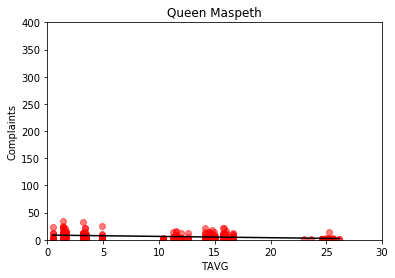

In [44]:
queen_maspeth=['4049500','4052500','4059900','4051300',
            '4060100','4051500','4053500','4049700','4053100','4049302']
fig,ax=plt.subplots()
imx=[]
imy=[]
for tract in queen_maspeth:
    nearest_st = lut[tract]
    corr_df = heating[['date', tract]].merge(Newtavg[['date', nearest_st]], 
                                                left_on = "date", right_on="date")
    #corr = corr_df[tract] corr_df[nearest_st]
    #corr[tract] = 
    #H=corr_df[corr_df[tract]>22.5]
    imy.extend(corr_df[tract])
    imx.extend(corr_df[nearest_st])
    ax.scatter(corr_df[nearest_st],corr_df[tract],color='r',alpha=0.5)

    
d = np.vstack([imx, imy])
not_nan = d[:,~np.isnan(d).any(axis=0)]
myx, myy = not_nan    
slope, intercept, r_value, p_value, std_err = st.linregress(myx, myy)
theory_x = np.linspace(myx.min(), myx.max(), 100)
predicted_y = slope*theory_x +intercept
ax.plot(theory_x, predicted_y, color="black")
ax.set(xlabel='TAVG',ylabel='Complaints',title='Queen Maspeth')
ax.set_xlim(0,30)
ax.set_ylim(0,400)
fig.savefig('Heating Queen Maspeth')

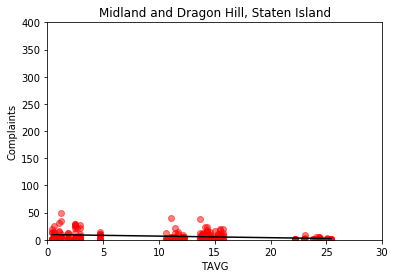

In [46]:
Staten_island1=['5011402','5012200','5013400','5011202','5012804'
               ,'5011201','5011401','5009602','5009601','5007000']
#midland beach,dragon hill
fig,ax=plt.subplots()
imx=[]
imy=[]
for tract in Staten_island:
    nearest_st = lut[tract]
    corr_df = heating[['date', tract]].merge(Newtavg[['date', nearest_st]], 
                                                left_on = "date", right_on="date")
    #corr = corr_df[tract] corr_df[nearest_st]
    #corr[tract] = 
    #H=corr_df[corr_df[tract]>22.5]
    ax.scatter(corr_df[nearest_st],corr_df[tract],color='r',alpha=0.5)
    imy.extend(corr_df[tract])
    imx.extend(corr_df[nearest_st])
    

d = np.vstack([imx, imy])
not_nan = d[:,~np.isnan(d).any(axis=0)]
myx, myy = not_nan    
slope, intercept, r_value, p_value, std_err = st.linregress(myx, myy)
theory_x = np.linspace(myx.min(), myx.max(), 100)
predicted_y = slope*theory_x +intercept
ax.plot(theory_x, predicted_y, color="black")    
    
ax.set(xlabel='TAVG',ylabel='Complaints',title='Midland and Dragon Hill, Staten Island')
ax.set_xlim(0,30)
ax.set_ylim(0, 400)
fig.savefig('Heating Midland and Dragon Hill, Staten Island')

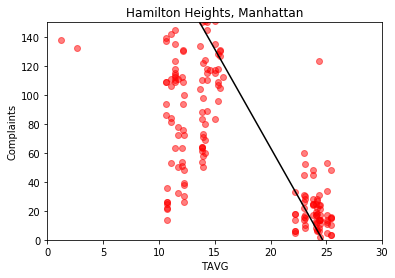

In [48]:
manhatten1=['1022500','1022700','1022900','1023300',
           '1023700','1023100','1023501']
fig,ax=plt.subplots()
imx=[]
imy=[]
for tract in manhatten1:
    nearest_st = lut[tract]
    corr_df = heating[['date', tract]].merge(Newtavg[['date', nearest_st]], 
                                                left_on = "date", right_on="date")
    #corr = corr_df[tract] corr_df[nearest_st]
    #corr[tract] = 
    #H=corr_df[corr_df[tract]>22.5]
    ax.scatter(corr_df[nearest_st],corr_df[tract],color='r',alpha=0.5)
    imy.extend(corr_df[tract])
    imx.extend(corr_df[nearest_st])
    

d = np.vstack([imx, imy])
not_nan = d[:,~np.isnan(d).any(axis=0)]
myx, myy = not_nan    
slope, intercept, r_value, p_value, std_err = st.linregress(myx, myy)
theory_x = np.linspace(myx.min(), myx.max(), 100)
predicted_y = slope*theory_x +intercept
ax.plot(theory_x, predicted_y, color="black")    
    
ax.set(xlabel='TAVG',ylabel='Complaints',title='Hamilton Heights, Manhattan')
ax.set_xlim(0,30)
ax.set_ylim(0,150)
fig.savefig('Heating Hamilton Heights, Manhattan')

In [60]:
NewHeating=seasonal_tracts[seasonal_tracts['complaint_type'].str.match("HEATING")].sum()[2:]

In [61]:
NewHeating=pd.Series(NewHeating).to_frame()
NewHeating=NewHeating.rename(columns={0:'Heating Complaint'})
NewHeating.head()

Heating Complaint
1000100                 0
1000201               330
1000202               386
1000500                 0
1000600              1506

In [63]:
tracts2=gdf[['boro_ct201','geometry']].merge(NewHeating,
                   left_on='boro_ct201',right_index=True)

In [64]:
tracts2.head()

boro_ct201                                           geometry  \
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...   
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...   
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...   
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...   
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...   

  Heating Complaint  
0               531  
1              1699  
2               390  
3                10  
4               166

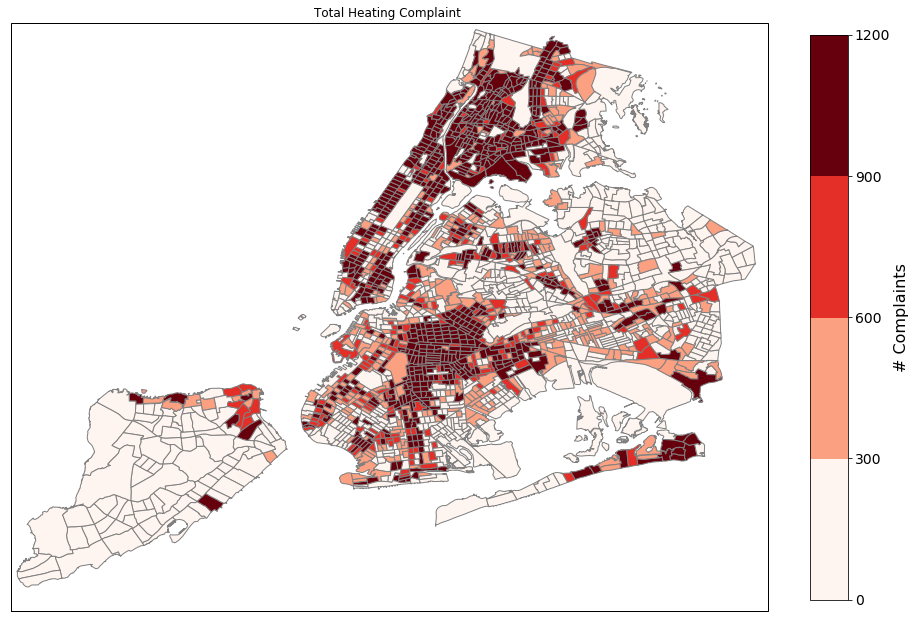

In [66]:
import numpy as np
cmap=mcm.Reds
#norm=mcolors.Normalize(vmin=tracts2['Sewer Complaint'].min(),vmax=tracts2['Sewer Complaint'].max())
bins = np.arange(0,1500,300)
norm = mcolors.BoundaryNorm(bins, cmap.N)
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15, 15),
                       subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
              ccrs.Geodetic())
ax.set_title(f"Total Heating Complaint ")
for _, row in tracts2.iterrows():
   
    color = cmap(norm(row["Heating Complaint"]))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='grey')
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("# Complaints" , fontsize=16)
fig.savefig('Heating Total Complaints')